In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import operator as op
import itertools
import matplotlib.pyplot as plt
import numpy.linalg
import cmath
import multiprocessing
import itertools
import scipy.optimize as optimize

In [2]:
# Δεδομένα
df = pd.read_csv('sx-stackoverflow.txt', sep="\s+", header = None)

# Ονομάσια στις στήλες
df.columns = ["source_id", "target_id", "timestamp"]
df.head()

,source_id,target_id,timestamp
0,9,8,1217567877
1,1,1,1217573801
2,13,1,1217606247
3,17,1,1217617639
4,48,2,1217618182


In [123]:
# Create a small dataset of 200 rows first 100 and last 100
# dataset = pd.concat([df.iloc[:50], df.iloc[-50:]]) 
dataset=df.iloc[0:300]
print(dataset)

     source_id  target_id   timestamp
0            9          8  1217567877
1            1          1  1217573801
2           13          1  1217606247
3           17          1  1217617639
4           48          2  1217618182
..         ...        ...         ...
295        122        257  1217861331
296          1         67  1217862281
297        214        214  1217862896
298        116        236  1217863267
299    2090742        257  1217863615

[300 rows x 3 columns]


In [4]:
# Υπολογισμός των χρονικών στιγμών t_min, t_max, ΔΤ, δτ
N = int(input('Enter Number Of Intervals: ')) # User Input

t_min = dataset.timestamp.min()
t_max = dataset.timestamp.max()

DT = t_max - t_min
dt = DT / N

print('Minimum Timestamp = ', t_min)
print('Maximum Timestamp = ', t_max)
print('DT = ', DT)
print('χρονική διάρκεια: ', dt)

Enter Number Of Intervals: 4
Minimum Timestamp =  1217567877
Maximum Timestamp =  1217863615
DT =  295738
χρονική διάρκεια:  73934.5


In [97]:
# Διαμέριση του συνολικού χρονικού διαστήματος
def create_intervals(dataset,N):
    
    intervals = []
    for j in range(0,N):
        print(j)
        #Start of time interval
        tj = t_min + j * dt
        
        #End of time interval
        tj1 = t_min + (j+1) * dt

        intervals.append([int(tj),int(tj1)])

    return(intervals)

In [98]:
time_intervals = create_intervals(dataset,N)
print('Time Intervals: ', time_intervals)

0
1
2
3
Time Intervals:  [[1217567877, 1217641811], [1217641811, 1217715746], [1217715746, 1217789680], [1217789680, 1217863615]]


Nodes:  134
Edges:  272


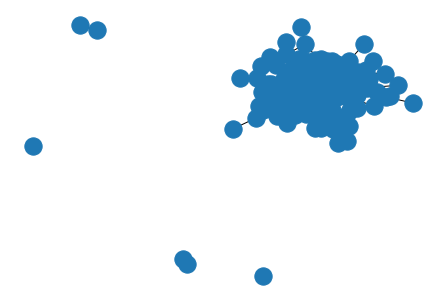

In [99]:
# Returns a graph from Pandas DataFrame containing an edge list.
G = nx.from_pandas_edgelist(dataset, 'source_id', 'target_id', 'timestamp')
print('Nodes: ',G.number_of_nodes())
print('Edges: ',G.number_of_edges())
E = G.edges()
nx.draw(G)

In [133]:
def centrality_plots(G):
    
    # Compute the degree centrality: deg_cent
    deg_cent = nx.degree_centrality(G)
    # Compute the in degree centrality: in_deg_cent
#     in_deg_cent = nx.in_degree_centrality(G)
    # Compute the Out-Degree Centrality: out_deg_cent
#     out_deg_cent = nx.out_degree_centrality(G)
    # Compute the closeness Centrality: clo_cent
    clo_cent = nx.closeness_centrality(G)
    # Compute the Betweenness Centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)
    # Compute the Eigenvector Centrality: eig_cent
#     eig_cent = nx.eigenvector_centrality(G)
    # Compute the Katz Centrality: katz_cent
    L = nx.normalized_laplacian_matrix(G)
    e = numpy.linalg.eigvals(L.A)
    katz_cent = nx.katz_centrality_numpy(G, max(e).real)
    
    # degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

    # Plots 
    fig, axs = plt.subplots(3, 2, figsize=(15,15))

    # Plot a histogram of the degree centrality distribution of the graph.
    deg_cent_values = np.asarray(list(deg_cent.values())) 
    axs[0][0].set_ylabel('Relative Frequency')
    axs[0][0].set_title('degree centrality')
    axs[0][0].hist(deg_cent_values, weights = np.zeros_like(deg_cent_values) + 1. / deg_cent_values.size)
    
    # Plot a histogram of the closeness Centrality distribution of the graph
    clo_cent_values = np.asarray(list(clo_cent.values())) 
    axs[0][1].set_title('Closeness Centrality')
    axs[0][1].hist(clo_cent_values, weights = np.zeros_like(clo_cent_values) + 1. / clo_cent_values.size)

    # Plot a histogram of the Betweenness Centrality distribution of the graph
    bet_cent_values = np.asarray(list(bet_cent.values())) 
    axs[1][0].set_title('Betweenness Centrality')
    axs[1][0].hist(bet_cent_values, weights = np.zeros_like(bet_cent_values) + 1. / clo_cent_values.size)

    # Plot a histogram of the Eigenvector Centrality distribution of the graph
#     eig_cent_value = np.asarray(list(eig_cent.values())) 
#     axs[1][1].set_title('Eigenvector Centrality')
#     axs[1][1].hist(eig_cent_value, weights = np.zeros_like(eig_cent_value) + 1. / clo_cent_values.size)

    # Plot a histogram of the Katz Centrality distribution of the graph
    katz_cent_value = np.asarray(list(katz_cent.values())) 
    axs[2][0].set_title('Katz Centrality')
    axs[2][0].set_xlabel('Normalized Centrality Measure Values')
    axs[2][0].hist(katz_cent_value, weights = np.zeros_like(katz_cent_value) + 1. / katz_cent_value.size)



    plt.show()

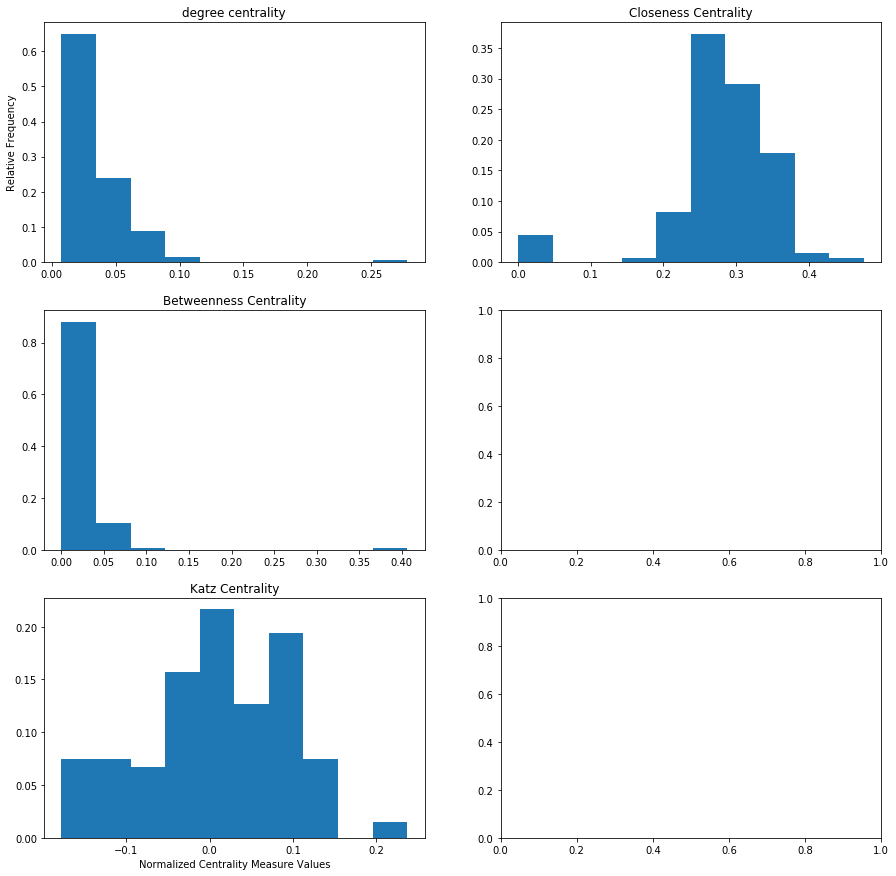

In [134]:
centrality_plots(G)

In [135]:
def set_g(T,dataset):
    G = nx.from_pandas_edgelist(dataset, 'source_id','target_id','timestamp')
    GT = nx.Graph()
    for n,item in G.adj.items():
        for nt, peritem in item.items():
            d = peritem['timestamp']
            if (d >= T[0]) and (d <= T[1]):
                GT.add_edge(n,nt, timestamp= d)
    return GT

In [136]:
# t0 = t_min
# t1 = t0+dt
# T = nx.DiGraph()

# while N > 0:
#     for e in E:
#         a=e[0]; b=e[1]
#         ts=int(G[a][b]['timestamp'])
#         if (ts >= t0) and (ts < t1):
#             T.add_edge(a,b)
#     N -= 1
# nx.draw(T) 

Ntimes = N
print(Ntimes)
x=0
Glist = []
while x < Ntimes:
    print("G on T",x)
    T = time_intervals[x]
    GN = set_g(T,dataset)
    Glist.append(GN)
    x+=1

4
G on T 0
G on T 1
G on T 2
G on T 3


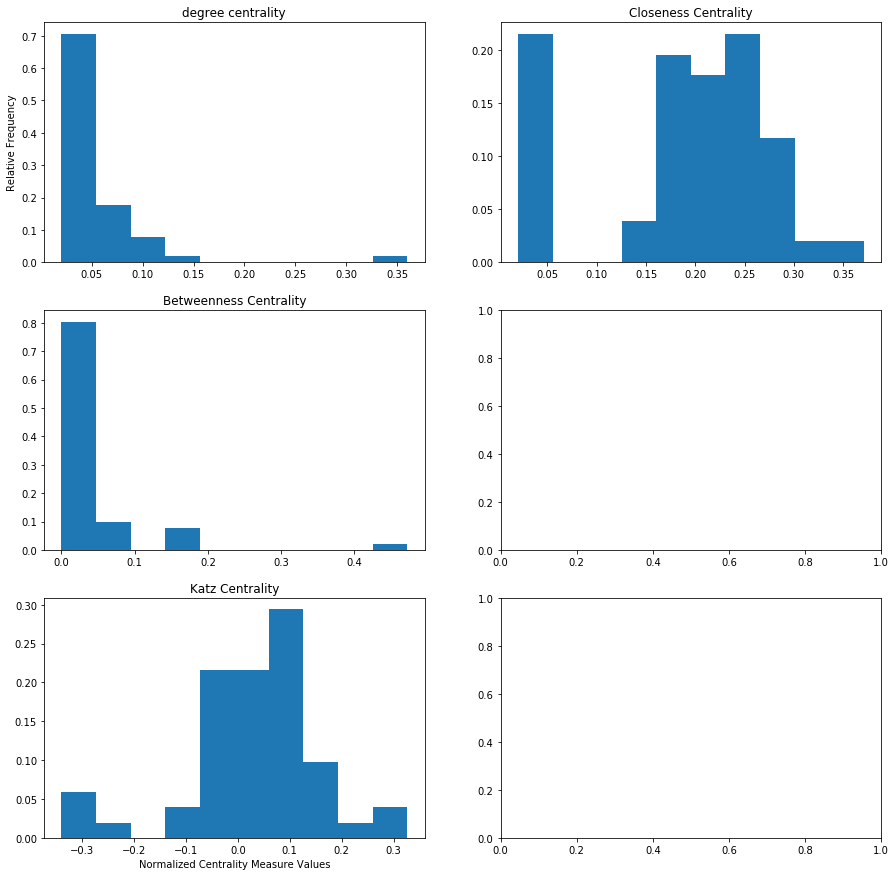

In [138]:
while x < Ntimes:
    print(x)
#     centrality_plots(Glist[x])
    x+=1
    
centrality_plots(Glist[1])

In [104]:
def v_inter(G1,G2):
    
    S1=set(G1.nodes())
    S2=set(G2.nodes())
    
    return set.intersection(S1,S2) #Return the common nodes

In [105]:
def e_inter(G,Vlist):
    
    Snodes=set(G.nodes())
    
    GT = nx.Graph()
    for n,item in G.adj.items():
        for nt, peritem in item.items():
#             d = peritem['timestamp']
            if ((n in Vlist) and (nt in Vlist)):
                GT.add_edge(n,nt)
    
    return GT.edges() #Return edges

In [109]:
#Q5
NTimes5 = N
Vlist = []
x = 0
Eprevlist = []
Enextlist = []
while x < NTimes5-1:
    V = v_inter(Glist[x],Glist[x+1])
    Vlist.append(sorted(V))
#     print(Vlist[x])
    Eprevlist.append(e_inter(Glist[x],Vlist[x]))
    Enextlist.append(e_inter(Glist[x+1],Vlist[x]))
#     print(x)
#     print(Vlist[x])
#     print(Glist[x].edges())
#     print(Eprevlist[x])
#     print(Glist[x+1].edges())
#     print(Enextlist[x])
    x+=1
    
    


In [117]:
#Q6
def graph_distance(Vlist,Gtemp):
        
        #Graph distance calculation
        graph_matrix = pd.DataFrame(nx.floyd_warshall_numpy(Gtemp), index=Vlist, columns=Vlist)
        pd.options.display.float_format = '{:,.0f}'.format
    
        return(graph_matrix)
def common_neighbors(Vlist,Gtemp):
    
    #Calculate all vertices permutations
    permutations = list(itertools.permutations(Vlist, 2))

    df=pd.DataFrame(0,index=Vlist, columns=Vlist)

    for u,v in permutations:

        df.loc[u, v]= len(sorted(nx.common_neighbors(Gtemp,u,v)))
    
    return(df)

def jaccard_distance(Vlist,Gtemp):
    
    jacc = list(nx.jaccard_coefficient(Gtemp))

    df=pd.DataFrame(0,index=Vlist, columns=Vlist)

    for i in range(0,len(jacc)):
        df.loc[jacc[i][0],jacc[i][1]] = jacc[i][2]
        df.loc[jacc[i][1],jacc[i][0]] = jacc[i][2]
        
    return(df) 

def adamic_distance(Vlist,Gtemp):
    
   
    adam = list(nx.adamic_adar_index(Gtemp))

    df=pd.DataFrame(0,index=Vlist, columns=Vlist)

    for i in range(0,len(adam)):
        df.loc[adam[i][0],adam[i][1]] = adam[i][2]
        df.loc[adam[i][1],adam[i][0]] = adam[i][2]
        
    return(df)

def preferencial_attachment(Vlist,Gtemp):
    
    pref = list(nx.preferential_attachment(Gtemp))

    df=pd.DataFrame(0,index=Vlist, columns=Vlist)

    for i in range(0,len(pref)):
            df.loc[pref[i][0],pref[i][1]] = pref[i][2]
            df.loc[pref[i][1],pref[i][0]] = pref[i][2]
            
    return(df)



In [122]:
NTimes6 = N
x=0
GraphDistanceList =[]
commonNeighborsList = []
jacardDistanceList = []
adamicDistanceList = []
preferencialAttachmentList = []

while x < NTimes6-1:
    Gtemp = nx.Graph()
    Gtemp.add_nodes_from(Vlist[x])
    Gtemp.add_edges_from(Eprevlist[x])
    Gtemp.add_edges_from(Enextlist[x])
#     length = nx.all_pairs_shortest_path_length(G)
#     GraphDistanceList.append(list(length)) #Ερωτηση i
#     print(GraphDistanceList[x])

    GraphDistanceList.append(graph_distance(Vlist[x],Gtemp))

    commonNeighborsList.append(common_neighbors(Vlist[x],Gtemp))#Ερωτηση ii
#     print(commonNeighborsList[x])

    jacardDistanceList.append(jaccard_distance(Vlist[x],Gtemp))#Ερωτηση iii
#     print(jacardDistanceList[x])

    adamicDistanceList.append(adamic_distance(Vlist[x],Gtemp))#Ερωτηση iv
#     print(adamicDistanceList[x])
    preferencialAttachmentList.append(preferencial_attachment(Vlist[x],Gtemp))#Ερωτηση v
#     print(preferencialAttachmentList[x])
    x+=1
    
print(GraphDistanceList[0])
    
    

         1        2        9        17       25       32       34       \
1              0        3        3        1        5        2        6   
2              3        0        3        2        5        3        6   
9              3        3        0        2        4        3        5   
17             1        2        2        0        4        1        5   
25             5        5        4        4        0        5        3   
32             2        3        3        1        5        0        6   
34             6        6        5        5        3        6        0   
35             4        3        3        3        3        4        4   
39             5        5        4        4        2        5        1   
40             4        5        4        3        3        4        2   
48             2        1        2        1        4        2        5   
49             2        3        3        1        5        2        6   
50             4        5        4    